In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the diabetes dataset
diabetes = pd.read_csv('/content/diabetes (1).csv')

# Separate features (x) and target variable (y)
features = diabetes.iloc[:, 0:8].values
target = diabetes.iloc[:, 8].values

# Split the dataset into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=0
)

# Standardize the features using StandardScaler
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
features_train_pca = pca.fit_transform(features_train)
features_test_pca = pca.transform(features_test)
explained_variance = pca.explained_variance_ratio_

# Fit Logistic Regression to the Training set
logistic_classifier = LogisticRegression(random_state=0)
logistic_classifier.fit(features_train_pca, target_train)

# Predictions on the test set
predictions = logistic_classifier.predict(features_test_pca)

# Calculate and print accuracy
accuracy = accuracy_score(target_test, predictions)
print("Accuracy:", accuracy * 100, "%")


Accuracy: 75.97402597402598 %


<ipython-input-2-ebe137629a03>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


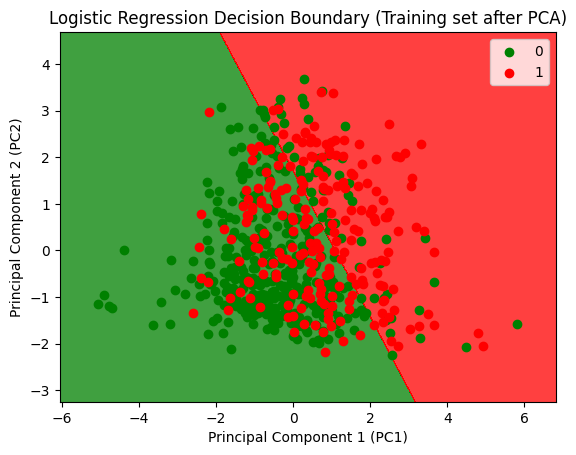

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = features_train_pca, target_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, logistic_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Logistic Regression Decision Boundary (Training set after PCA)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


<ipython-input-3-74a093e2691e>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


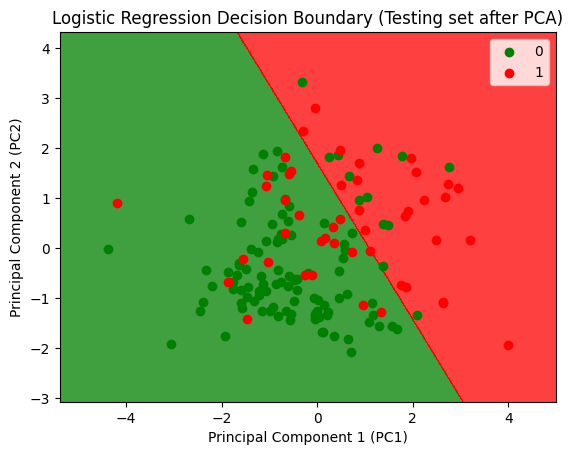

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = features_test_pca, target_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, logistic_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Logistic Regression Decision Boundary (Testing set after PCA)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Fit Decision Tree to the Training set
tree_classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
tree_classifier.fit(features_train_pca, target_train)

# Predictions on the test set
tree_predictions = tree_classifier.predict(features_test_pca)

# Calculate and print accuracy
tree_accuracy = accuracy_score(target_test, tree_predictions)
print("Decision Tree Accuracy:", tree_accuracy * 100, "%")


Decision Tree Accuracy: 70.12987012987013 %


<ipython-input-6-c125834dc807>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


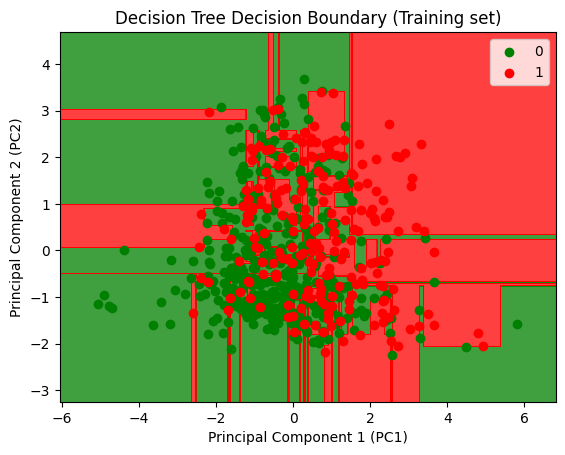

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X_set, y_set = features_train_pca, target_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, tree_classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Decision Tree Decision Boundary (Training set)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.show()


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Fit KNN Classification to the Training set
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_classifier.fit(features_train_pca, target_train)

# Predictions on the test set
knn_predictions = knn_classifier.predict(features_test_pca)

# Calculate and print accuracy
knn_accuracy = accuracy_score(target_test, knn_predictions)
print("KNN Classification Accuracy:", knn_accuracy * 100, "%")


KNN Classification Accuracy: 74.02597402597402 %
